<Figure size 640x480 with 0 Axes>

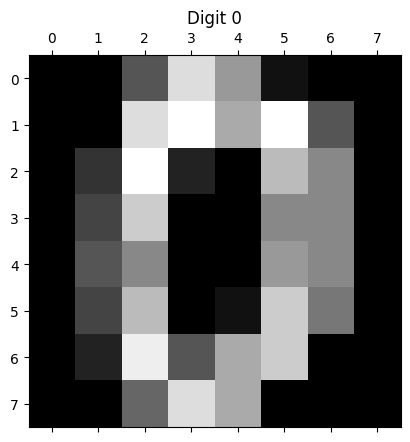

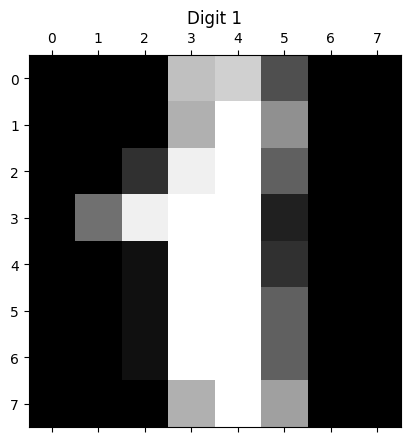

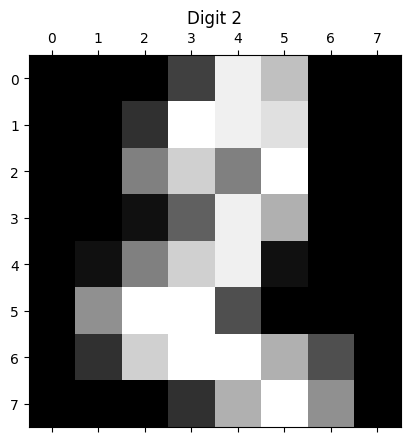

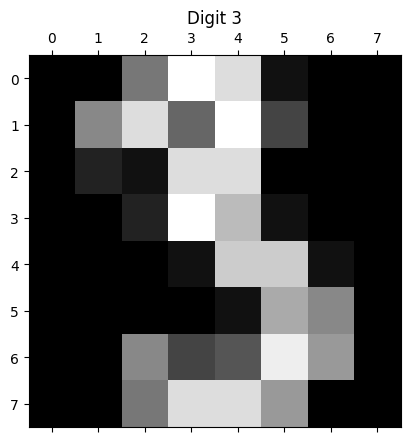

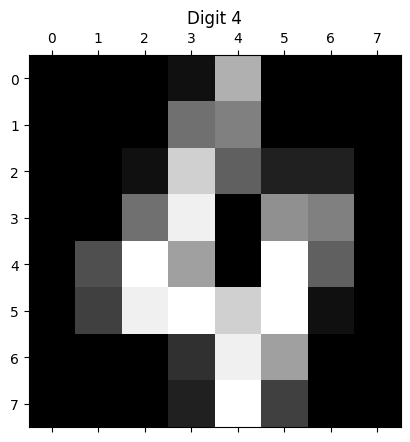

Attributes of the dataset: ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
First data point: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Model accuracy: 0.975


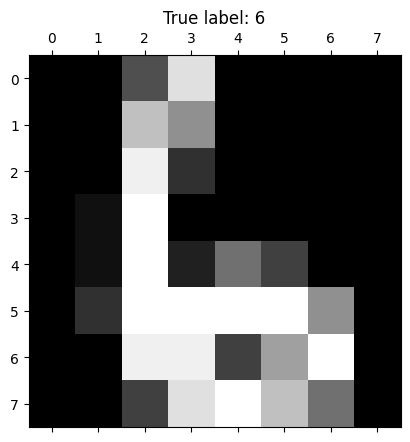

Predicted label for index 67: [6]
Predictions for the first 5 data points: [0 1 2 3 4]
Confusion matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


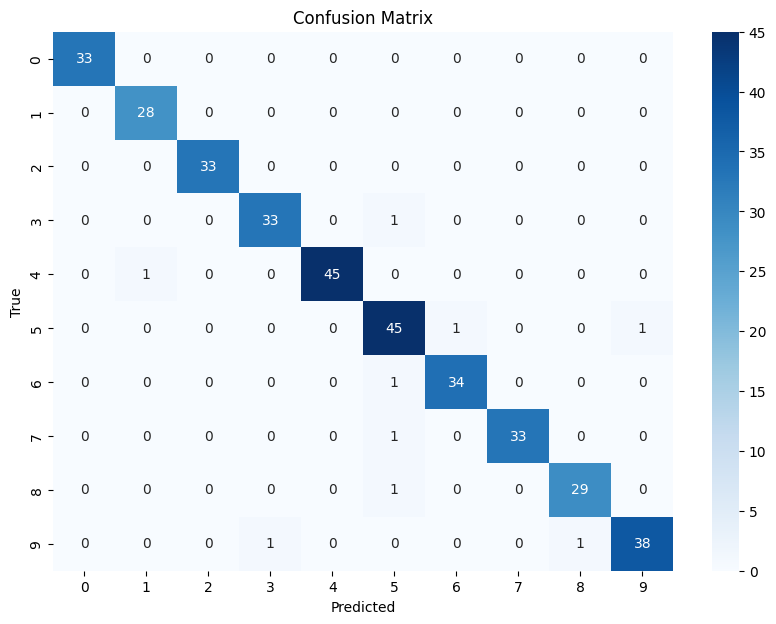

In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sn

# Load the digits dataset
digits = load_digits()

# Plotting the first few images
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])
    plt.title(f'Digit {digits.target[i]}')
plt.show()

# Displaying attributes of the dataset
print("Attributes of the dataset:", dir(digits))
print("First data point:", digits.data[0])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=10000)  # Increase max_iter to ensure convergence
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f"Model accuracy: {score}")

# Visualize a specific digit and predict its value
plt.matshow(digits.images[67])
plt.title(f'True label: {digits.target[67]}')
plt.show()
predicted_label = model.predict([digits.data[67]])
print(f"Predicted label for index 67: {predicted_label}")

# Predict the first five data points
predictions = model.predict(digits.data[0:5])
print(f"Predictions for the first 5 data points: {predictions}")

# Confusion matrix
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
print("Confusion matrix:\n", cm)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
